In [1]:
import pandas as pd
import pandas as pd
from darts import TimeSeries
from darts.metrics.metrics import rmse
from darts.dataprocessing.transformers import Scaler

In [2]:
actuals = pd.read_excel('../data/filtered_actuals.xlsx')


In [3]:
broker_target = pd.read_excel('../data/filtered_broker_target_filledna.xlsx')

In [4]:
actuals_series = TimeSeries.from_dataframe(actuals, time_col="FiscalYear")
broker_target_series = TimeSeries.from_dataframe(broker_target, time_col="FiscalYear")

<Axes: xlabel='FiscalYear'>

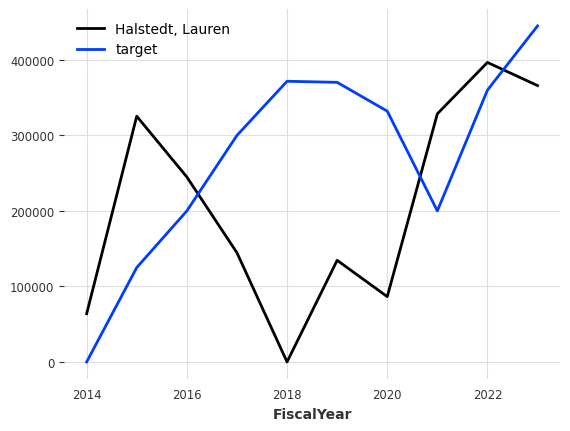

In [5]:
import random

name = random.choices(actuals.columns[1:])
actuals_series[name].plot()
broker_target_series[name].plot(label='target')

In [6]:
actuals

,FiscalYear,"Armstrong, Brooke","Breen, Daniel","Cosby, Russell","Curry, Ashley","Darrow, Terry","Eckert, Jeff","Esquivel, James","Forkner, Fiona","Haggar, James",...,"Selner, Bradley","Sheehy, Ahnie","Shipley, Christopher","Smith, Jubal","Stout, Christopher","Taguwa, Andrew","Toon, Larry","Weatherby, Samuel","Whitman, Paul","Wood, Alan"
0,2014,1380583.55,171398.16,770342.33,88839.39,1003383.83,750000.05,750000.01,384698.30,301113.55,...,3188933.63,151.72,356160.84,1771504.76,102575.75,901100.59,2259899.50,637791.99,1562838.05,856670.45
1,2015,631544.09,2194829.40,463416.90,335981.55,815760.82,997785.67,997785.62,998910.44,525300.89,...,2209823.93,142877.89,633904.48,7359378.40,250876.09,1011467.41,983978.26,1043269.72,1997295.13,786498.94
2,2016,1125976.16,1492879.42,1897362.90,401767.00,360931.29,995381.26,990905.52,1301178.85,641300.49,...,2076925.86,218536.00,808734.66,2113433.76,439799.56,714371.11,68855.76,576363.95,1207541.71,608604.08
3,2017,1526556.11,2425068.14,216952.35,267907.45,588227.17,812467.24,807640.25,665690.49,533198.91,...,2135517.42,333502.62,1325188.67,1495679.59,439281.72,998930.30,7801514.26,683077.75,363890.00,626262.49
4,2018,1786851.61,1557403.06,1035997.29,506123.66,429284.82,939797.56,939452.24,701267.31,540839.62,...,837927.59,394708.13,1221506.39,1477429.31,439691.67,1171395.37,543049.64,1662274.72,947842.79,433940.03
5,2019,2927638.63,1966813.19,2630950.86,393480.17,500000.00,610360.97,610355.66,589002.22,776827.65,...,3435213.05,500000.00,875584.42,9027557.98,837256.10,500000.00,563242.34,542493.41,798450.78,676387.34
6,2020,2774229.05,694513.79,85726.02,226290.45,69027.42,555576.34,555576.49,585002.05,765932.58,...,5020462.00,303459.66,1030727.50,1858116.40,729262.65,826222.42,204838.14,128476.25,1288304.98,92353.73
7,2021,1521039.35,1176575.40,1734397.73,529705.03,890021.64,1162108.21,1121160.16,334546.52,293815.62,...,3908492.32,217530.65,1382872.15,4769175.02,888623.37,650988.56,3920452.28,513034.18,1154146.70,273606.92
8,2022,138760.99,243170.51,262885.16,557611.48,240795.18,1101099.99,1071926.24,750000.00,1310808.71,...,4545074.40,488972.28,3319633.14,584342.95,900358.85,1277070.87,26433.64,559862.94,363262.31,500000.00
9,2023,-10737.07,427007.70,15142.76,592223.29,9041.67,986421.71,846948.54,1319272.27,2250000.00,...,2703434.77,126778.85,1530226.11,758521.60,1331616.06,1417720.02,26137.89,1128375.68,334568.10,180236.10


In [7]:
adjusted_values = actuals.set_index('FiscalYear').subtract(broker_target.set_index('FiscalYear'), fill_value=0)

In [8]:
adjusted_values

,"Armstrong, Brooke","Breen, Daniel","Cosby, Russell","Curry, Ashley","Darrow, Terry","Eckert, Jeff","Esquivel, James","Forkner, Fiona","Haggar, James","Halstedt, Lauren",...,"Selner, Bradley","Sheehy, Ahnie","Shipley, Christopher","Smith, Jubal","Stout, Christopher","Taguwa, Andrew","Toon, Larry","Weatherby, Samuel","Whitman, Paul","Wood, Alan"
FiscalYear,,,,,,,,,,,,,,,,,,,,,
2014,1.805836e+05,-3.286018e+05,-2.296577e+05,88839.390000,-1.096616e+06,-6.499999e+05,-6.500000e+05,-9.153017e+05,-4.888645e+04,63826.420000,...,1.438934e+06,1.517200e+02,-4.383916e+04,5.715048e+05,-97424.250000,1.511006e+05,7.598995e+05,1.377920e+05,6.283805e+04,2.566704e+05
2015,-6.184559e+05,1.694829e+06,-1.536583e+06,185981.550000,-7.842392e+05,-6.022143e+05,-6.022144e+05,-5.010896e+05,-6.746991e+05,200404.980000,...,-2.901761e+05,6.787789e+04,2.339045e+05,4.859378e+06,876.090000,1.564674e+05,-5.160217e+05,4.432697e+05,4.972951e+05,3.649894e+04
2016,1.259762e+05,-7.120580e+03,3.973629e+05,1767.000000,-1.039069e+06,2.953813e+05,2.909055e+05,3.345119e+05,4.130049e+04,44928.120000,...,-1.230741e+05,5.853600e+04,3.087347e+05,-8.865662e+05,-60200.440000,-2.522959e+05,-1.431144e+06,-1.056970e+06,-2.924583e+05,-1.913959e+05
2017,7.765561e+05,1.046068e+06,-7.830477e+05,-132092.550000,1.882272e+05,1.246724e+04,7.640250e+03,-8.430951e+04,-9.668011e+05,-155412.630000,...,1.355174e+05,1.335026e+05,5.751887e+05,-4.320410e+03,39281.720000,2.489303e+05,-8.484857e+05,8.307775e+04,-6.361100e+05,-1.737375e+05
2018,5.368516e+05,-6.612636e+05,3.599729e+04,106123.660000,-2.707152e+05,-1.460202e+06,-1.460548e+06,-1.548733e+06,-4.591604e+05,-371693.837626,...,-9.120724e+05,1.947081e+05,-5.784936e+05,-7.412367e+05,-760308.330000,1.713954e+05,-1.456950e+06,8.122747e+05,-2.052157e+06,-1.966060e+06
2019,1.129872e+06,-1.026318e+04,1.115166e+06,-51530.939703,-2.050786e+05,-8.915379e+05,-1.945633e+06,-1.530289e+06,-6.407682e+05,-235746.620497,...,1.626935e+06,3.248936e+05,-4.757091e+05,6.453255e+06,215826.965383,-6.083308e+05,-4.608450e+06,7.840206e+04,-4.314439e+05,-1.009001e+06
2020,2.742290e+05,-1.652773e+06,-1.914274e+06,-125151.279956,-7.527816e+05,-1.831980e+05,-9.337331e+05,-1.214998e+06,-4.666669e+05,-245645.433615,...,2.520462e+06,1.596490e+05,-6.115426e+05,-5.474355e+05,-667990.228887,-1.173778e+06,-3.951619e+05,-4.215238e+05,4.883050e+05,-7.076463e+05
2021,-6.019366e+05,-1.011660e+06,2.084408e+04,-970294.970000,6.229331e+04,-4.182520e+05,4.211602e+05,-1.400899e+06,-1.089182e+06,128614.380000,...,1.138487e+06,-2.824693e+05,-6.171279e+05,3.204376e+06,12413.672974,-1.510295e+06,9.860882e+05,-2.214554e+04,-7.453600e+05,-2.294243e+06
2022,-1.495171e+06,-1.046829e+06,-9.782690e+05,-532388.520000,-7.420482e+04,-5.289000e+05,-5.580738e+05,-1.418313e+06,6.080871e+04,36638.070000,...,1.816427e+06,-4.110277e+05,2.054633e+06,-9.556571e+05,-359641.150000,-7.332888e+05,-2.885264e+06,-2.094642e+04,-1.273635e+06,-1.196021e+06


In [11]:
adjusted_values.columns

Index(['Armstrong, Brooke', 'Breen, Daniel', 'Cosby, Russell', 'Curry, Ashley',
       'Darrow, Terry', 'Eckert, Jeff', 'Esquivel, James', 'Forkner, Fiona',
       'Haggar, James', 'Halstedt, Lauren', 'Holcomb, Curtis',
       'Holland, Melissa', 'Hoobler, Howard', 'Hull, Calvin',
       'Jones, Elizabeth', 'Kackley, Kelley', 'Leatherman, Andrew',
       'Littlejohn, Torrey', 'McCarthy, Conor', 'McCarthy, Thomas',
       'McGown, Jeremy', 'McNeil, Jon', 'Mullin, Daryl', 'Selner, Bradley',
       'Sheehy, Ahnie', 'Shipley, Christopher', 'Smith, Jubal',
       'Stout, Christopher', 'Taguwa, Andrew', 'Toon, Larry',
       'Weatherby, Samuel', 'Whitman, Paul', 'Wood, Alan'],
      dtype='object')

In [13]:
meta_data = {}

for name in adjusted_values.columns:

    no_of_lesser_value = adjusted_values[name] < 0

    beta = sum(no_of_lesser_value.values)


    confidence = (len(adjusted_values[name]) - beta)/len(adjusted_values[name])
    

    filter_broker_target = broker_target[name][no_of_lesser_value]

    filter_adjust_values = adjusted_values[name][no_of_lesser_value]

    broker_target_individual = filter_broker_target.dropna()
    
    filter_adjust_values_individual = filter_adjust_values.dropna()
    

    abs_filter_adjust_values_individual = abs(filter_adjust_values_individual)

    average = abs_filter_adjust_values_individual.div(broker_target_individual)

    sum_average = sum(average.values)

    confidence = confidence * (1 - 0.001*beta*(sum_average))

    meta_data[name] = [confidence]


    

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [ ]:
confidence_score= pd.DataFrame(meta_data)

In [ ]:
confidence_score.to_excel('../data/confidence_score.xlsx', index=False)

In [ ]:
no_of_lesser_value = adjusted_values[name] < 0

In [ ]:
sum(no_of_lesser_value)

4

In [ ]:
adjusted_values.reset_index(inplace=True)

In [ ]:
sum(adjusted_values[name] < 0)

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [ ]:
filter = adjusted_values[name] < 0

In [ ]:
beta = sum(filter.values)[0]

In [ ]:
filter_broker_target = broker_target[name][adjusted_values[name] < 0]

In [ ]:
filter_adjust_values = adjusted_values[name][adjusted_values[name] < 0]

In [ ]:
broker_target_individual = filter_broker_target.dropna()
filter_adjust_values_individual = filter_adjust_values.dropna()

In [ ]:
abs_filter_adjust_values_individual = abs(filter_adjust_values_individual)

In [ ]:
average = abs_filter_adjust_values_individual.div(broker_target_individual)

In [ ]:
abs_filter_adjust_values_individual

,"Armstrong, Brooke"
1,6.184559e+05
7,6.019366e+05
8,1.495171e+06
9,1.708113e+06


In [ ]:
broker_target_individual

,"Armstrong, Brooke"
1,1.250000e+06
7,2.122976e+06
8,1.633932e+06
9,1.697376e+06


In [ ]:
average

,"Armstrong, Brooke"
1,0.494765
7,0.283534
8,0.915075
9,1.006326


In [ ]:
sum(average.values)

array([2.69970015])

In [ ]:
0.6*(1 - 0.01*beta*(sum(average.values)[0]))

0.5352071964727098

In [ ]:
for name in actuals.columns[1:]:

    


In [ ]:
actuals.columns[1:]

Index(['Armstrong, Brooke', 'Breen, Daniel', 'Cosby, Russell', 'Curry, Ashley',
       'Darrow, Terry', 'Eckert, Jeff', 'Esquivel, James', 'Forkner, Fiona',
       'Haggar, James', 'Halstedt, Lauren', 'Holcomb, Curtis',
       'Holland, Melissa', 'Hoobler, Howard', 'Hull, Calvin',
       'Jones, Elizabeth', 'Kackley, Kelley', 'Leatherman, Andrew',
       'Littlejohn, Torrey', 'McCarthy, Conor', 'McCarthy, Thomas',
       'McGown, Jeremy', 'McNeil, Jon', 'Mullin, Daryl', 'Selner, Bradley',
       'Sheehy, Ahnie', 'Shipley, Christopher', 'Smith, Jubal',
       'Stout, Christopher', 'Taguwa, Andrew', 'Toon, Larry',
       'Weatherby, Samuel', 'Whitman, Paul', 'Wood, Alan'],
      dtype='object')

In [ ]:
broker_target[name]

,"Armstrong, Brooke"
0,1.200000e+06
1,1.250000e+06
2,1.000000e+06
3,7.500000e+05
4,1.250000e+06
5,1.797766e+06
6,2.500000e+06
7,2.122976e+06
8,1.633932e+06
9,1.697376e+06
